### 0829 과제
- 데이터셋: 캐글 타이타닉
- 파이썬 머신러닝 완벽 가이드 p.129 ~ p.142
- 교차검증까지만

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 데이터 로드 & 전처리

In [2]:
rawDF = pd.read_csv(r'C:\Users\KDP-43\Desktop\머신러닝_1\data\titanic_train.csv')
rawDF.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('\n ### 학습 데이터 정보 ### \n')
print(rawDF.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


##### Null 값 처리
- sklearn에서는 Null 처리 X
- 교재 기준
	- age => 평균
	- 나머지 칼럼 => 'N'

In [5]:
rawDF['Age'].fillna( rawDF['Age'].mean(), inplace=True)
rawDF['Cabin'].fillna( 'N', inplace=True)
rawDF['Embarked'].fillna( 'N', inplace=True)

# Null 값 확인
print(f'데이터 세트 Null 값 개수:	{rawDF.isnull().sum().sum()}')

데이터 세트 Null 값 개수:	0


##### 문자열 피쳐 전처리
- sex, cabin, embarked 칼럼

In [9]:
print(f' Sex 값 분포:\n  {rawDF["Sex"].value_counts()}')
print(f'\n Cabin 값 분포:\n  {rawDF["Cabin"].value_counts()}')
print(f'\n Embarked 값 분포:\n  {rawDF["Embarked"].value_counts()}')

 Sex 값 분포:
  Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
  Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

 Embarked 값 분포:
  Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [8]:
# Cabin 속성 맨 앞 문자만 추출
rawDF['Cabin'] = rawDF['Cabin'].str[:1]
print(rawDF['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


#### 성별에 따른 생존자 분석
- 0: 사망 , 1: 생존

In [10]:
rawDF.groupby( ['Sex','Survived'] )['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

##### 시각화

<Axes: xlabel='Sex', ylabel='Survived'>

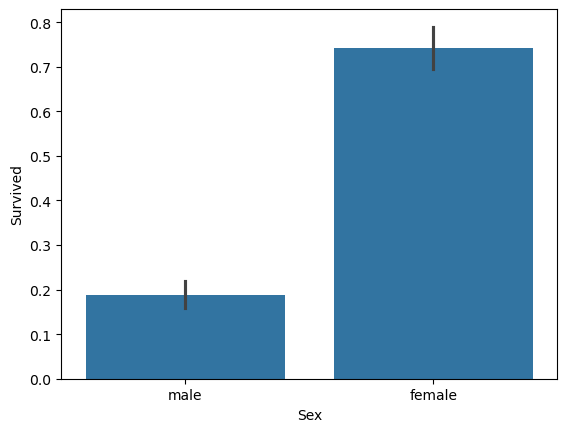

In [11]:
sns.barplot(x='Sex', y='Survived',data=rawDF)

<Axes: xlabel='Pclass', ylabel='Survived'>

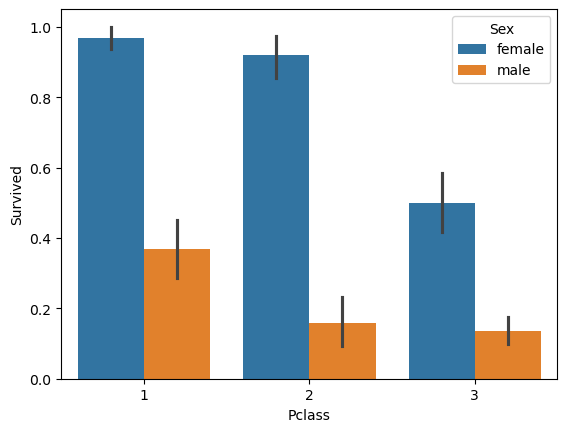

In [12]:
# 부에 따른 남녀 생존비율 시각화
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=rawDF)

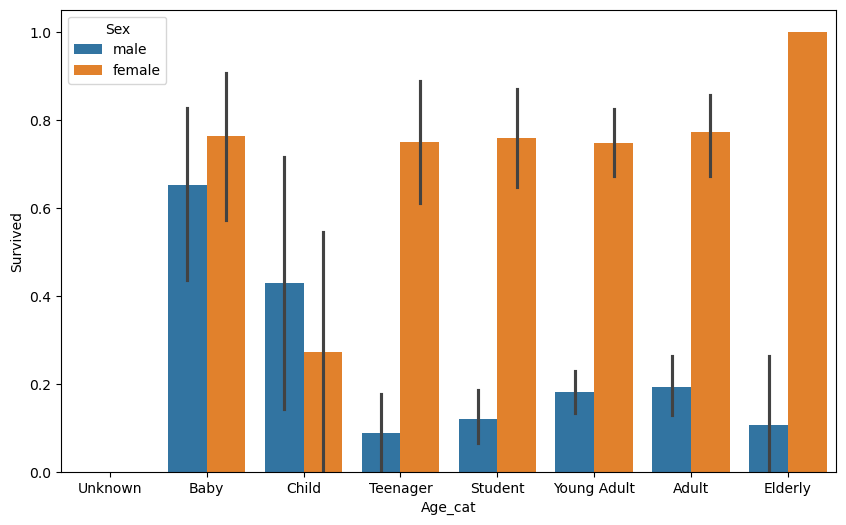

In [14]:
## 나이에 따른 생존비율
# Age 범위에 따라 카테고리화

# age 칼럼 값을 받아 카테고리 반환
def get_category(age):
    cat = ''
    
    if age <= -1: cat='Unknown'
    elif age<= 5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
    
    return cat
    
plt.figure(figsize=(10,6))

# x축 xtick label
group_names = ['Unknown', 'Baby','Child','Teenager','Student','Young Adult', 'Adult', 'Elderly']

rawDF['Age_cat'] = rawDF['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=rawDF, order=group_names)
rawDF.drop('Age_cat', axis=1, inplace=True)


##### 피쳐 인코딩:	문자열 -> 정수형 
- 인코더:		LabelEncoder
- 피쳐	: 		cabin, sex, embarked

In [15]:
from sklearn.preprocessing import LabelEncoder
# 여러 칼럼 한번에 인코딩 변환
def encode_features(rawDF):
    
	features = ['Cabin', 'Sex','Embarked']

	for feature in features:
		# 인코더 인스턴스 생성
		Lencoder = LabelEncoder()

		# 데이터에 맞춰 맵핑
		Lencoder = Lencoder.fit(rawDF[feature])

		# 변환
		rawDF[feature] = Lencoder.transform(rawDF[feature])

	return rawDF


encoded_DF = encode_features(rawDF).copy()

encoded_DF.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


##### 사용자 선언 데이터 전처리 함수

In [16]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)			# 나이: 평균으로 대체
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)							# 요금:	0으로 대체
    return df

# 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]							# 클래스 알파벳만 추출
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [19]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv(r'C:\Users\KDP-43\Desktop\머신러닝_1\data\titanic_train.csv')

y_titanic_df = titanic_df['Survived']								# targetSR
X_titanic_df= titanic_df.drop('Survived',axis=1)					# featureDF

X_titanic_df = transform_features(X_titanic_df)						# featureDF 전처리

#### 테스트/학습 데이터셋 분리
- test_size= 0.2

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


#### 결정트리 알고리즘 학습 & 교차 검증

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 결정트리----------------------------------------------------------------------------------------
# 결정트리 Classifier 인스턴스 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

## 교차검증----------------------------------------------------------------------------------------

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    
    # 폴드 세트가 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    
	# K번째 모델 성능 점수 저장 리스트
    scores = []
    
    # KFold 교차 검증
    for idx , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(idx+1, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
    
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

DecisionTreeClassifier 정확도: 0.7877
교차 검증 1 정확도: 0.7542
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.7697
교차 검증 5 정확도: 0.8202
평균 정확도: 0.7823


##### 교차 검증 w/ cross_val_score() Ver.
- stratifiedKFold 로 폴드 세트 분리!!! 	==> 위 셀과 미묘한 차이

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도:	{1:.4f}'.format(iter_count+1, accuracy))
    
print('\n평균 정확도 {0:.4f}'.format(np.mean(scores)))

교차 검증 1 정확도:	0.7430
교차 검증 2 정확도:	0.7753
교차 검증 3 정확도:	0.7921
교차 검증 4 정확도:	0.7865
교차 검증 5 정확도:	0.8427

평균 정확도 0.7879


##### GridSearchCV
- 반환: 클래스
- DTclassifier의 최적 하이퍼파라미터 탐색
- 예측 성능 점수 측정

<br> Reference: https://velog.io/@hyunicecream/GridSearchCV%EB%9E%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EC%82%AC%EC%9A%A9%ED%95%A0%EA%B9%8C </br>

In [25]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 변경값 저장 리스트
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

# 베스트 학습 모델 저장
best_dclf = grid_dclf.best_estimator_

# 최적 하이퍼 파라미터로 학습된 Estimator로 예측 & 평가
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
